In [1]:
import torch
import os
import glob as glob

In [2]:
with open('/home/jykang/NeMo/tokenizer/ctc/vocab.txt') as f:
    ctc_token = f.readlines()

def ctc_alignment_check_(token):
    label =''
    for i, t in enumerate(token):
        if t != 128:
            new_token = ctc_token[t-1].replace('\n', '').replace('#', '')
            new_token = new_token+(7-len(new_token))*' '
            label += new_token
        else:
            label += '_      '
        # label += ' '
    print(label)

def show_uncertainty(un):
    output = ''
    for i, t in enumerate(un):
        output = output + "{:.4f}".format(t.item()) + ' '
    print(output)

def show_timestep(un):
    output = ''
    for i, t in enumerate(un):
        output = output + "{:.0f}".format(t.item()) + ' '*(7-(len(str(t.item()))))
    print(output)

In [13]:
a = torch.tensor([128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,  16, 128,
        128,  39, 128, 128,  36,  24,  24,  39,  39, 128,  19,  19,   7,   2,
          2,  19,  19,   6,   6, 128,  79,  79,   2,  30, 128,  34, 128,   1,
        128,  36, 128,  21, 128,   1, 128,  16, 128,  17, 128,  81, 128, 128,
         85, 128, 128, 128, 128, 128, 128, 128,  62, 128, 128, 128,  36, 128,
         15, 128,  47,  14,  14, 128, 125, 128, 128, 128,   1,  13,  13,  17,
         10,  10,   7,  32,  32, 128,   7, 128, 128,  18, 128,  49, 128,  32,
          6, 128,  21, 128,   8, 128, 128,  91, 128, 128, 128,  28,  28, 128,
         58,  58,  23, 128,   8,   8,  45,  21, 128,   5,   4,   4, 128,  36,
        128,   7, 128, 128, 128,  21, 128,  23, 128, 128,   3,  11,  11,  40,
          1,   1,   4,   1,  42,  42,  60, 128, 128, 128, 128,  16,   7,   7,
        126, 128, 128,  27, 128,   1,  21, 128,  30, 128,   6, 128, 128,  10,
        128,   9, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128])
b = torch.tensor([128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,  16, 128,
        128,  39, 128, 128,  36, 128,  24,  39,  39, 128,  19, 128,   7,   2,
          2,  19,  19, 128,   6, 128,  79,   2,   2,  30, 128,  34, 128,   1,
          1,  32, 128,  21, 128,  14, 128,  16, 128,  17, 128,  81, 128, 128,
         85, 128, 128, 128, 128, 128, 128, 128,  62, 128, 128, 128,  36,  15,
         15, 128,  47,  14,  14, 128, 125, 128, 128, 128,   1,  13,  13,  17,
         10,  10,   7,  32,  32, 128,   7, 128,  18, 128, 128,  49, 128,  32,
          6,   6,  21, 128,   8,   8, 128,  91, 128, 128, 128,  28,  28, 128,
         58,  58,  23, 128,   8,   8,  45,  21, 128,   5,   4, 128, 128,  36,
        128,   7, 128, 128, 128,  21, 128,  23,  23, 128,   3,  11,  11,  40,
          1,   4, 128,   1,  42,  42,  60, 128, 128, 128,  16, 128,   7, 128,
        126, 128, 128,  27,  27,   1,  21,  21,  30, 128,   6, 128, 128,  10,
        128,   9, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128])
c = torch.tensor([0.0047, 0.0047, 0.0047, 0.0047, 0.0047, 0.0047, 0.0047, 0.0047, 0.0047,
        0.0047, 0.0047, 0.0047, 0.0511, 0.1499, 0.0073, 0.0614, 0.4567, 0.0169,
        0.0885, 0.6607, 0.0367, 0.6615, 0.0418, 0.0479, 0.0320, 0.4807, 0.0288,
        0.1098, 0.0295, 0.1238, 0.0320, 0.7121, 0.3125, 0.2241, 0.3311, 0.6383,
        0.2776, 0.0914, 0.0784, 0.1579, 0.2654, 0.2715, 0.4565, 0.5299, 0.4703,
        0.3783, 0.0995, 0.4482, 0.0421, 0.1303, 0.4143, 0.0305, 0.5686, 0.1316,
        0.0047, 0.0048, 0.0342, 0.0110, 0.0047, 0.0047, 0.0047, 0.0047, 0.0047,
        0.0080, 0.2531, 0.2835, 0.0047, 0.3018, 0.2429, 0.6150, 0.5914, 0.3372,
        0.2204, 0.1415, 0.2776, 0.0047, 0.4888, 0.5281, 0.0047, 0.1388, 0.0307,
        0.0275, 0.1679, 0.0310, 0.0521, 0.0800, 0.0289, 0.6289, 0.1350, 0.0749,
        0.0318, 0.0051, 0.0860, 0.2142, 0.0067, 0.0369, 0.0607, 0.0330, 0.5266,
        0.4991, 0.1398, 0.3786, 0.0536, 0.5144, 0.0047, 0.0612, 0.0170, 0.0047,
        0.0435, 0.0293, 0.0346, 0.0047, 0.4767, 0.5670, 0.1576, 0.4537, 0.3039,
        0.4989, 0.0386, 0.0398, 0.3383, 0.0335, 0.5557, 0.5962, 0.0047, 0.0370,
        0.0051, 0.0327, 0.0432, 0.0047, 0.0049, 0.0402, 0.0192, 0.5128, 0.5264,
        0.0341, 0.0374, 0.0547, 0.4984, 0.4816, 0.0311, 0.2280, 0.6251, 0.0312,
        0.1164, 0.1784, 0.0680, 0.5585, 0.0047, 0.0047, 0.2907, 0.4100, 0.0610,
        0.5578, 0.0537, 0.0090, 0.0052, 0.5870, 0.6631, 0.0304, 0.2735, 0.5532,
        0.0968, 0.1064, 0.0342, 0.0120, 0.2041, 0.0269, 0.1079, 0.0340, 0.0047,
        0.0047, 0.0047, 0.0047, 0.0047, 0.0047, 0.0047, 0.0047, 0.0047, 0.0047],
       device='cuda:0')
d = torch.arange(c.shape[0])
# e = torch.


show_timestep(d)
ctc_alignment_check_(a)
ctc_alignment_check_(b)
show_uncertainty(c)

0      1      2      3      4      5      6      7      8      9      10     11     12     13     14     15     16     17     18     19     20     21     22     23     24     25     26     27     28     29     30     31     32     33     34     35     36     37     38     39     40     41     42     43     44     45     46     47     48     49     50     51     52     53     54     55     56     57     58     59     60     61     62     63     64     65     66     67     68     69     70     71     72     73     74     75     76     77     78     79     80     81     82     83     84     85     86     87     88     89     90     91     92     93     94     95     96     97     98     99     100    101    102    103    104    105    106    107    108    109    110    111    112    113    114    115    116    117    118    119    120    121    122    123    124    125    126    127    128    129    130    131    132    133    134    135    136    137    138    139    140    141    142   

In [14]:
# san francisco's carefree spirit was fully exemplified before the ashes of the great fire of nineteen o six were cold
# san francisco's carefrey spirit was fully exemplified before the ashes of the great fire of nineteen o six were cold
print(c[10:170].mean())

tensor(0.1944, device='cuda:0')


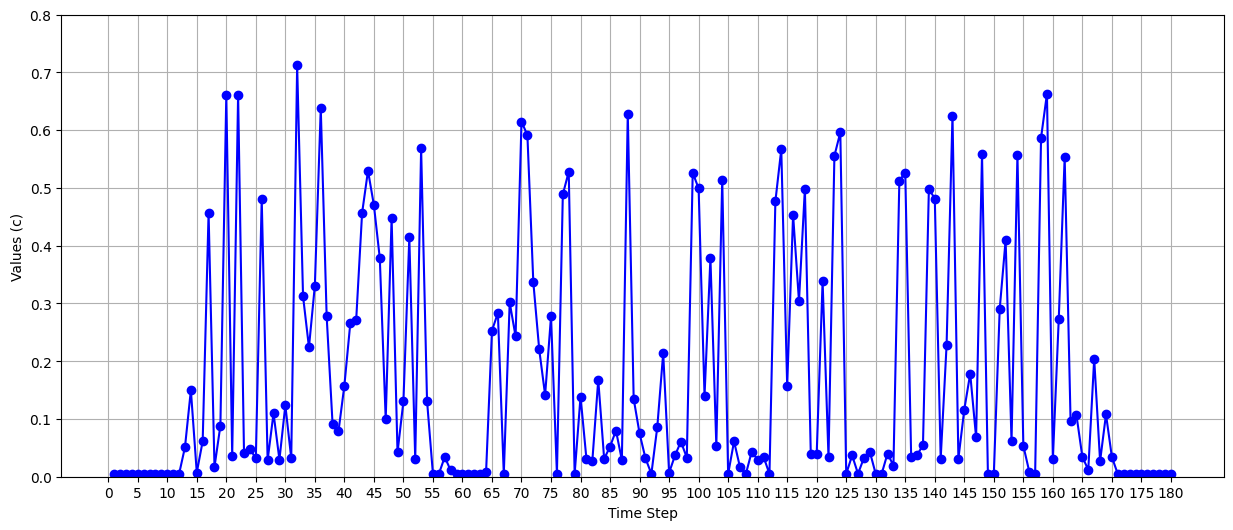

In [16]:
import torch
import matplotlib.pyplot as plt

# x축 정의 (time step)
x = torch.arange(1, len(c) + 1)

# 그래프 그리기
plt.figure(figsize=(15, 6))
plt.plot(x.cpu().numpy(), c.cpu().numpy(), marker='o', linestyle='-', color='b')
# plt.plot(x.cpu().numpy(), e.cpu().numpy(), marker='x', linestyle='-', color='r')

# x축 틱 마커 설정
plt.xticks(torch.arange(0, len(c) + 1, 5).cpu().numpy())

# 축 레이블 설정
plt.xlabel('Time Step')
plt.ylabel('Values (c)')

plt.ylim(0.0, 0.8)

# 그래프 표시
plt.grid(True)
plt.show()


In [9]:
a = torch.tensor([128, 128, 128, 128,   8, 128, 103, 128, 128,  32,  32, 128,  32, 128,
         48, 128,  78, 128, 128, 128, 128, 128, 103, 128,  25, 128,   1, 128,
        128,  74, 128, 128, 101, 128, 128,   3,   3,  44,   2,   2, 128,   2,
        128,  53,   7,   7, 128,  51, 128,  40,  40,  19,  19,   4, 128,   7,
         65, 128,  55, 128, 128, 128,  45, 128, 128,  31, 128,  13, 128,  39,
        128, 128, 128, 128, 128, 128,  91, 128, 128, 128, 128, 128, 128,   8,
        128,  45, 128,  21,   5,   5,  82, 128, 128, 128,   3,  11,  15,  15,
         13,  48,  31,  31,  23,  23, 128,  63,   2,   2,   2,  29, 128,   5,
        128,   4, 128,  50, 128,  11, 128,   2, 128,  12, 128, 128,  21, 128,
         12, 128, 128,  13, 128,  31,   7,   7,  19, 128,  39, 128,   2,   2,
        128, 128, 128, 128])
b = torch.tensor([128, 128, 128, 128,   8, 128, 103, 128, 128, 128, 128,  32, 128, 128,
         48, 128,  78, 128, 128,  25, 128, 128, 103, 128,  25,  25,   1,   1,
         74,  74, 128, 128, 101, 128, 128,   3,   3,  44,   2,   2, 128,   2,
        128,  53, 128,   7, 128,  51, 128, 128,  40,  19,  19,   4, 128,   7,
         65, 128,  55,  55, 128, 128,  45, 128, 128,  31, 128,  13, 128, 128,
         39, 128, 128, 128, 128, 128,  91, 128, 128, 128, 128, 128, 128,   8,
        128,  45, 128,  21,   5,   5,  82,  82, 128, 128,   3,  11,  11,  15,
         13,  48,  48,  31, 128,  23, 128,  63, 128,   2,   2,  29, 128,   5,
        128,   4, 128,  50, 128,  11, 128,   2, 128,  12, 128,  21, 128, 128,
         12, 128, 128,  13,  31,  31,   7,   7,  19, 128,  39,  39, 128,   2,
        128, 128, 128, 128])
c = torch.tensor([0.0047, 0.0047, 0.0047, 0.1125, 0.0609, 0.0071, 0.6126, 0.6003, 0.2299,
        0.7111, 0.6968, 0.7418, 0.6248, 0.3198, 0.5973, 0.5012, 0.6423, 0.3049,
        0.7014, 0.7739, 0.1753, 0.0203, 0.2258, 0.3170, 0.3594, 0.5287, 0.5191,
        0.5109, 0.5581, 0.4374, 0.0047, 0.0047, 0.3429, 0.4124, 0.0047, 0.5331,
        0.1677, 0.0309, 0.4477, 0.0597, 0.0109, 0.0299, 0.0048, 0.0425, 0.2255,
        0.0585, 0.0050, 0.0562, 0.0971, 0.2643, 0.1238, 0.0322, 0.0916, 0.0326,
        0.6201, 0.0300, 0.0418, 0.2055, 0.2193, 0.3322, 0.0047, 0.0079, 0.0391,
        0.0047, 0.5366, 0.4577, 0.0047, 0.0434, 0.1288, 0.3669, 0.2130, 0.0047,
        0.0047, 0.0047, 0.0047, 0.1380, 0.1377, 0.0288, 0.0047, 0.0047, 0.0047,
        0.0047, 0.2327, 0.0424, 0.0047, 0.4767, 0.5794, 0.0390, 0.3855, 0.3805,
        0.5680, 0.5339, 0.0047, 0.0047, 0.0415, 0.4487, 0.4924, 0.3988, 0.0276,
        0.0436, 0.3309, 0.0385, 0.2252, 0.0352, 0.0138, 0.0443, 0.5811, 0.0295,
        0.2622, 0.0356, 0.5582, 0.0713, 0.2036, 0.0333, 0.0687, 0.0506, 0.0141,
        0.0315, 0.0187, 0.0293, 0.1439, 0.0936, 0.0792, 0.4702, 0.5679, 0.0047,
        0.0429, 0.0061, 0.5420, 0.3401, 0.4499, 0.3847, 0.0288, 0.0291, 0.0392,
        0.3616, 0.5193, 0.4532, 0.4876, 0.0296, 0.0081, 0.0047, 0.0047, 0.0047],
       device='cuda:0')
# e = torch.
d = torch.arange(c.shape[0])

show_timestep(d)
ctc_alignment_check_(a)
ctc_alignment_check_(b)
show_uncertainty(c)
# show_uncertainty(e)

0      1      2      3      4      5      6      7      8      9      10     11     12     13     14     15     16     17     18     19     20     21     22     23     24     25     26     27     28     29     30     31     32     33     34     35     36     37     38     39     40     41     42     43     44     45     46     47     48     49     50     51     52     53     54     55     56     57     58     59     60     61     62     63     64     65     66     67     68     69     70     71     72     73     74     75     76     77     78     79     80     81     82     83     84     85     86     87     88     89     90     91     92     93     94     95     96     97     98     99     100    101    102    103    104    105    106    107    108    109    110    111    112    113    114    115    116    117    118    119    120    121    122    123    124    125    126    127    128    129    130    131    132    133    134    135    136    137    138    139    140    141    142   

In [10]:
# the hof brau however is less distinctively german as the greater number of its patrons are americans
# the hofbra however is less distinctively german as the greater number of its patrons are americans
# the hofbraw however is less distinctively german as the greater number of its patrons are americans
print(c[4:140].mean())

tensor(0.2273, device='cuda:0')


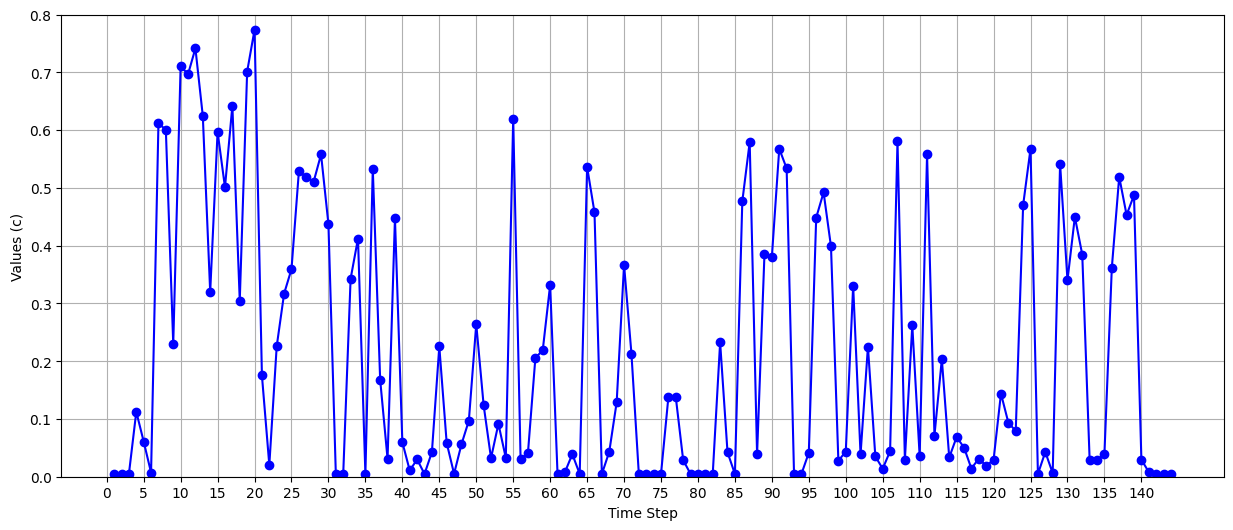

In [12]:
import torch
import matplotlib.pyplot as plt

# x축 정의 (time step)
x = torch.arange(1, len(c) + 1)

# 그래프 그리기
plt.figure(figsize=(15, 6))
plt.plot(x.cpu().numpy(), c.cpu().numpy(), marker='o', linestyle='-', color='b')
# plt.plot(x.cpu().numpy(), e.cpu().numpy(), marker='x', linestyle='-', color='r')

# x축 틱 마커 설정
plt.xticks(torch.arange(0, len(c) + 1, 5).cpu().numpy())

# 축 레이블 설정
plt.xlabel('Time Step')
plt.ylabel('Values (c)')

plt.ylim(0.0, 0.8)

# 그래프 표시
plt.grid(True)
plt.show()

In [4]:
a = torch.tensor([128, 128, 128, 128, 128, 128, 128, 128, 128, 128,  64, 128,   6, 128,
         13, 128,  17, 128,   2, 128, 128,  52, 128, 128, 128,  60, 128,  17,
        128,  42, 128,  18, 128,  12, 128, 114,  24, 128,  38, 128,   1, 128,
         77, 128, 128, 128,  51,   5,   5,  57,  57,  39,   4,   4,  35, 128,
        128,  60, 128,  79,  79,  32, 128,  34, 128,  21,  21,  47, 128, 128,
         99,  21, 128,   1,   1,   4, 128, 128, 128, 128,   3, 109,  61, 128,
          4, 128,  12, 128,  48,   6, 128,  65, 128,  36, 128, 128,   7, 128,
         10, 128, 128,  13,   6,   6, 128,  21, 128, 128, 128, 128, 128, 128,
        128,  20, 128, 128, 128, 128,  76, 128, 128, 128,  69,  25,  25,   6,
        128, 128,   3,  14,  14,   1, 128,  34,   2,   2,   3,  46,  46, 128,
         87, 128, 128,  21, 128, 128, 128,  53, 128,   7,   9,   9, 128,  12,
        128,  64, 128, 128,  71, 128, 128, 128,  54, 128, 128,  26, 128,  37,
        128,  61,  61, 128,  40,  40,  58, 128,   2, 128, 128, 128,  80, 128,
        128, 128,  29,  10,   5, 128, 128,  56, 128, 128, 128,  49, 128, 128,
        128,  26, 128, 128,  94, 128, 128, 128, 128, 128, 128, 128,  18, 128,
        128,  76, 128, 128, 128,  63, 128,   2,   2,   2,  45,   6, 128, 128,
          6,   9, 128,  30, 128,   6, 128,   6,  33, 128,  26, 128, 128,  20,
        128, 128, 128,  63,   2,   2,  16,  17,  17,  10,  10,  42, 128,   9,
          7,   7,   9, 128, 128,  16,  31, 128, 128,  54, 128,   7, 128,  56,
        128, 128, 128, 128, 128, 128])
b = torch.tensor([128, 128, 128, 128, 128, 128, 128, 128, 128, 128,  64, 128,   6, 128,
         13,  13,  17,  17,   2, 128, 128,  52, 128, 128, 128,  60, 128,  17,
        128,  42, 128,  18, 128,  12, 128, 114,  24, 128, 128,  38,   1, 128,
         77, 128, 128, 128,  51,   5,   5,  57,  57,  39,   4,   4, 128,  35,
        128, 128,  12, 128,  36, 128,  31, 128, 128,   6, 128,  10, 128,  99,
        128,  21, 128,   1,   1,   4, 128, 128, 128, 128,   3, 109,  61, 128,
          4, 128,  12, 128,  48,   6, 128,  65, 128,  29,  28, 128,   7, 128,
         10, 128,  13,  13,   6,   6, 128,  21, 128, 128, 128, 128, 128, 128,
        128,  20, 128, 128, 128, 128,  76, 128, 128, 128,  69,  25,  25,   6,
        128, 128,   3,  14,  14,   1,  34, 128,   2,   2,   3,  46,  46, 128,
         87, 128, 128,  21, 128, 128, 128,  53, 128,   7,   9,   9, 128,  12,
        128,  64, 128, 128,  71, 128, 128, 128,  54, 128, 128,  26, 128,  37,
        128,  61,  61, 128,  40,  40,  58,   2,   2, 128, 128, 128,  80, 128,
        128, 128,  29,  10,   5,   5, 128,  56, 128, 128, 128,  49, 128, 128,
        128,  26, 128, 128, 128,  94, 128, 128, 128, 128, 128, 128,  18, 128,
        128,  76, 128, 128, 128, 128,  63,   2,   2,   2,  45,   6, 128, 128,
          6,   9, 128,  30, 128,   6, 128,   6,  33, 128,  26, 128, 128,  20,
        128, 128, 128,  63,   2,   2,  16,  17,  17,  10,  10,  42, 128,   9,
          7,   7,   9, 128, 128,  16,  31, 128,  54, 128,   7, 128, 128,  56,
        128, 128, 128, 128, 128, 128])
c = torch.tensor([0.0047, 0.0047, 0.0047, 0.0047, 0.0047, 0.0047, 0.0047, 0.0047, 0.0047,
        0.0310, 0.0527, 0.0053, 0.1248, 0.3295, 0.1230, 0.4017, 0.5222, 0.6676,
        0.0591, 0.2766, 0.3746, 0.3782, 0.0047, 0.0047, 0.2712, 0.2332, 0.0047,
        0.1360, 0.3362, 0.0369, 0.1907, 0.0729, 0.2774, 0.0427, 0.1234, 0.0604,
        0.1092, 0.2396, 0.4099, 0.3295, 0.0478, 0.2211, 0.1741, 0.1955, 0.0047,
        0.2412, 0.0398, 0.0373, 0.0875, 0.0430, 0.1754, 0.0427, 0.1624, 0.1679,
        0.3799, 0.3209, 0.0047, 0.2193, 0.1649, 0.0165, 0.0603, 0.0684, 0.5367,
        0.2277, 0.5054, 0.6968, 0.6094, 0.6281, 0.0562, 0.5575, 0.5863, 0.0395,
        0.2917, 0.5012, 0.3138, 0.0334, 0.0048, 0.0047, 0.0047, 0.5877, 0.4234,
        0.0401, 0.0410, 0.2053, 0.0327, 0.0706, 0.0417, 0.5170, 0.0321, 0.0503,
        0.2034, 0.0404, 0.2041, 0.5751, 0.6188, 0.6999, 0.4282, 0.6768, 0.3653,
        0.4731, 0.3226, 0.3603, 0.3407, 0.0635, 0.4480, 0.1313, 0.0140, 0.0047,
        0.0047, 0.0047, 0.0047, 0.0047, 0.0047, 0.1528, 0.2030, 0.0047, 0.0047,
        0.0554, 0.0576, 0.0047, 0.0047, 0.0047, 0.0391, 0.1131, 0.0309, 0.0361,
        0.3371, 0.0088, 0.0373, 0.1615, 0.4255, 0.0462, 0.2533, 0.5592, 0.0293,
        0.5160, 0.0375, 0.2904, 0.2108, 0.2067, 0.1477, 0.0047, 0.0047, 0.0405,
        0.0901, 0.0047, 0.0052, 0.0412, 0.3548, 0.0357, 0.5274, 0.2338, 0.0095,
        0.0427, 0.0047, 0.4049, 0.5302, 0.0716, 0.0460, 0.0048, 0.0047, 0.0047,
        0.0362, 0.0163, 0.4816, 0.1963, 0.0047, 0.0419, 0.0262, 0.1528, 0.0742,
        0.0057, 0.0754, 0.0878, 0.0456, 0.3467, 0.0323, 0.0048, 0.0047, 0.0047,
        0.2169, 0.3033, 0.0047, 0.1257, 0.0959, 0.0302, 0.6053, 0.5972, 0.0150,
        0.0415, 0.0068, 0.0047, 0.0465, 0.0407, 0.0047, 0.0047, 0.0567, 0.0316,
        0.0122, 0.0047, 0.5208, 0.4969, 0.0047, 0.0047, 0.0048, 0.0052, 0.0047,
        0.0055, 0.0382, 0.0049, 0.0053, 0.0505, 0.0049, 0.0047, 0.0047, 0.3903,
        0.2654, 0.3412, 0.0294, 0.5481, 0.0435, 0.0357, 0.0216, 0.5214, 0.0380,
        0.0340, 0.0051, 0.0422, 0.5204, 0.4388, 0.0311, 0.0346, 0.0374, 0.1291,
        0.0318, 0.1439, 0.0047, 0.0455, 0.0101, 0.0047, 0.2005, 0.1127, 0.1683,
        0.0297, 0.0905, 0.3102, 0.0307, 0.0276, 0.0559, 0.0391, 0.0568, 0.0340,
        0.4944, 0.0318, 0.0339, 0.0485, 0.4526, 0.3870, 0.1700, 0.2127, 0.2839,
        0.3775, 0.4910, 0.6364, 0.3603, 0.1442, 0.0047, 0.0047, 0.0047, 0.0047,
        0.0047, 0.0047], device='cuda:0')
d = torch.arange(c.shape[0])
# e = torch.

show_timestep(d)
ctc_alignment_check_(a)
ctc_alignment_check_(b)
show_uncertainty(c)
# show_uncertainty(e)

0      1      2      3      4      5      6      7      8      9      10     11     12     13     14     15     16     17     18     19     20     21     22     23     24     25     26     27     28     29     30     31     32     33     34     35     36     37     38     39     40     41     42     43     44     45     46     47     48     49     50     51     52     53     54     55     56     57     58     59     60     61     62     63     64     65     66     67     68     69     70     71     72     73     74     75     76     77     78     79     80     81     82     83     84     85     86     87     88     89     90     91     92     93     94     95     96     97     98     99     100    101    102    103    104    105    106    107    108    109    110    111    112    113    114    115    116    117    118    119    120    121    122    123    124    125    126    127    128    129    130    131    132    133    134    135    136    137    138    139    140    141    142   

In [5]:
# thompson opened a large restaurant in o'farrell street just above fillmore and for two years or more did a thriving business his place being noted for its good cooking and its splendid service
# thompson opened a large restaurant in a ferol street just above philmore and for two years or more did a thriving business his place being noted for its good cooking and its splendid service
print(c[10:267].mean())

tensor(0.1682, device='cuda:0')


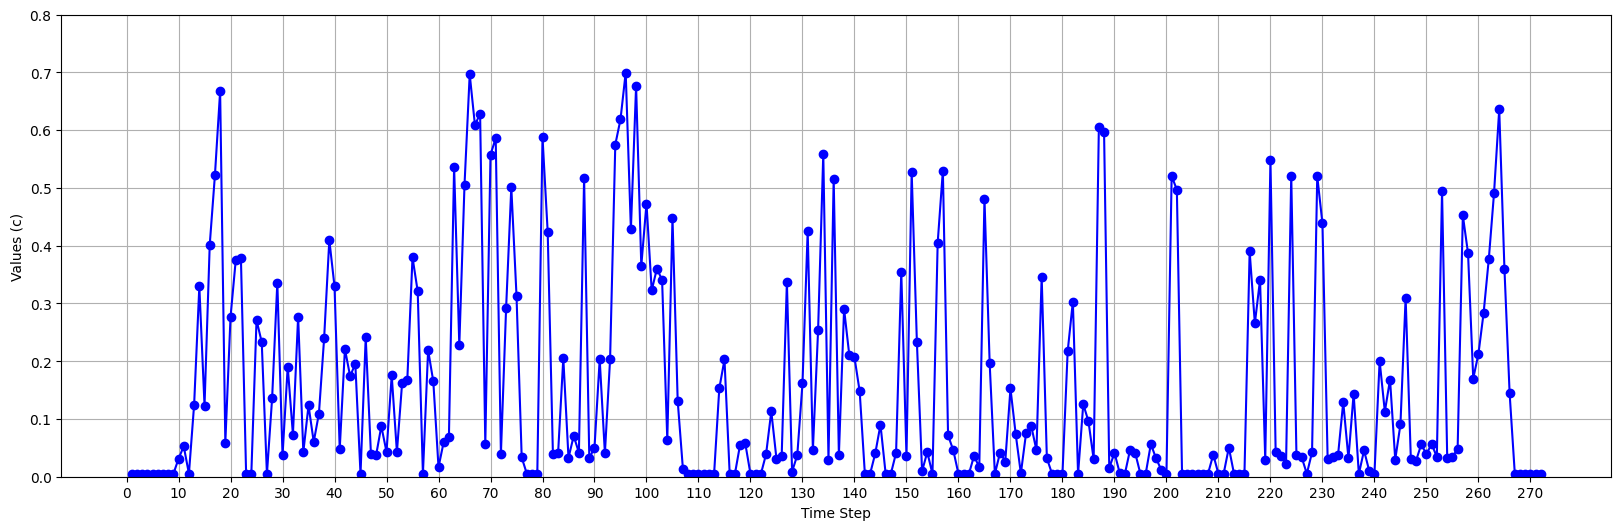

In [8]:
import torch
import matplotlib.pyplot as plt

# x축 정의 (time step)
x = torch.arange(1, len(c) + 1)

# 그래프 그리기
plt.figure(figsize=(20, 6))
plt.plot(x.cpu().numpy(), c.cpu().numpy(), marker='o', linestyle='-', color='b')
# plt.plot(x.cpu().numpy(), e.cpu().numpy(), marker='x', linestyle='-', color='r')

# x축 틱 마커 설정
plt.xticks(torch.arange(0, len(c) + 1, 10).cpu().numpy())

# 축 레이블 설정
plt.xlabel('Time Step')
plt.ylabel('Values (c)')


plt.ylim(0.0, 0.8)

# 그래프 표시
plt.grid(True)
plt.show()